In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

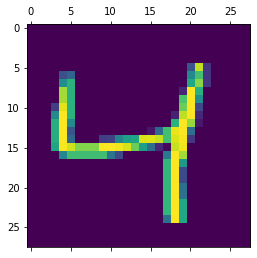

In [7]:
plt.matshow(X_train[2])

In [8]:
y_train[2]

4

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:

X_train = X_train / 255
X_test = X_test / 255

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
X_train_flattened=X_train.reshape(len(X_train),28*28)

X_train_flattened.shape

(60000, 784)

In [14]:
X_test_flattened=X_test.reshape(len(X_test),28*28)

X_test_flattened.shape


(10000, 784)

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=12)

Epoch 1/12
1875/1875 [==============================] - 1s 617us/step - loss: 0.7270 - accuracy: 0.8133
Epoch 2/12
1875/1875 [==============================] - 1s 591us/step - loss: 0.3099 - accuracy: 0.9146
Epoch 3/12
1875/1875 [==============================] - 1s 562us/step - loss: 0.2779 - accuracy: 0.9222
Epoch 4/12
1875/1875 [==============================] - 1s 560us/step - loss: 0.2696 - accuracy: 0.9242
Epoch 5/12
1875/1875 [==============================] - 1s 581us/step - loss: 0.2665 - accuracy: 0.9254
Epoch 6/12
1875/1875 [==============================] - 1s 590us/step - loss: 0.2608 - accuracy: 0.9278
Epoch 7/12
1875/1875 [==============================] - 1s 612us/step - loss: 0.2508 - accuracy: 0.9297
Epoch 8/12
1875/1875 [==============================] - 1s 579us/step - loss: 0.2553 - accuracy: 0.9301
Epoch 9/12
1875/1875 [==============================] - 1s 587us/step - loss: 0.2474 - accuracy: 0.9308
Epoch 10/12
1875/1875 [==============================] - 2s 1ms/

In [16]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 438us/step - loss: 0.2683 - accuracy: 0.9267


[0.26831114292144775, 0.9266999959945679]

In [17]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.2043288e-03, 8.1613551e-09, 9.0022683e-03, 9.6576309e-01,
       7.5951219e-04, 1.2025544e-01, 7.7510318e-09, 9.9987978e-01,
       5.5607289e-02, 6.0174924e-01], dtype=float32)

In [18]:
np.argmax(y_predicted[0])

7

In [19]:
np.argmax(y_predicted[1])

2

In [20]:

y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [21]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    6,    3,    3,    1,    0],
       [   0, 1118,    4,    2,    0,    1,    3,    2,    5,    0],
       [   4,    8,  947,   15,    7,    4,   10,   10,   25,    2],
       [   4,    0,   18,  932,    0,   22,    2,   10,   17,    5],
       [   1,    2,    9,    3,  906,    0,   10,    8,    9,   34],
       [  10,    3,    5,   41,    7,  785,    8,    7,   23,    3],
       [  14,    3,   12,    1,    7,   17,  902,    1,    1,    0],
       [   1,    8,   25,    4,    3,    1,    0,  962,    1,   23],
       [   9,   13,    8,   35,    9,   33,    7,   13,  841,    6],
       [  11,    8,    1,   13,   21,    7,    0,   33,    4,  911]])>

Text(69.0, 0.5, 'Truth')

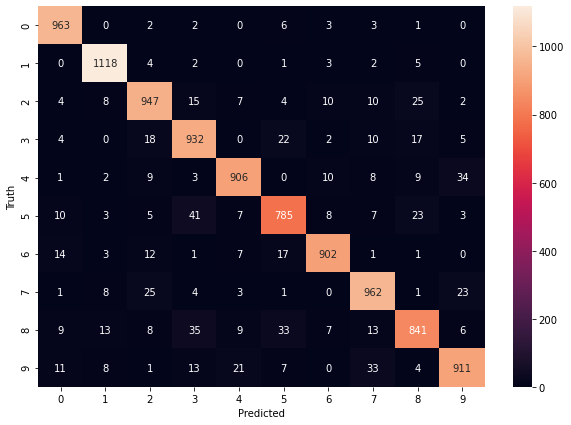

In [22]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4649 - accuracy: 0.8678
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1340 - accuracy: 0.9609
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0896 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0674 - accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0524 - accuracy: 0.9847


In [24]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 688us/step - loss: 0.0786 - accuracy: 0.9763


[0.07860478013753891, 0.9763000011444092]

Text(69.0, 0.5, 'Truth')

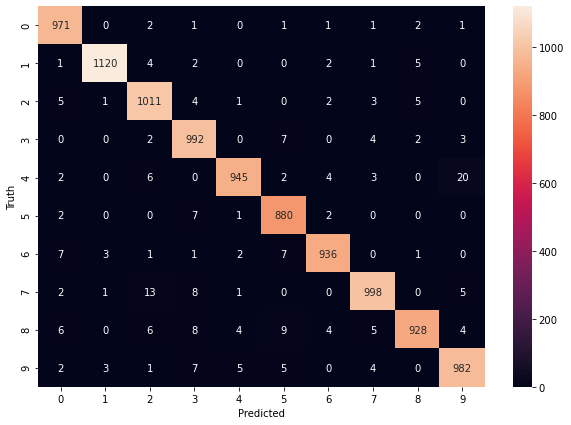

In [25]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [26]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

tb_callback=tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5,callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0478 - accuracy: 0.7322
Epoch 2/5
1875/1875 [==============================] - 2s 862us/step - loss: 0.3509 - accuracy: 0.9022
Epoch 3/5
1875/1875 [==============================] - 2s 877us/step - loss: 0.3001 - accuracy: 0.9152
Epoch 4/5
1875/1875 [==============================] - 2s 821us/step - loss: 0.2637 - accuracy: 0.9257
Epoch 5/5
1875/1875 [==============================] - 2s 849us/step - loss: 0.2469 - accuracy: 0.9289


In [31]:
!kill 16332
%load_ext tensorboard
%tensorboard --logdir logs/fit


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


kill: 16332: No such process


Reusing TensorBoard on port 6006 (pid 16332), started 4:02:42 ago. (Use '!kill 16332' to kill it.)